# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.9MB/s eta 0:00:01
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'0.23.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [7]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [10]:
len(movies)

244914

### List all Batman movies ever made

In [11]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [61]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
#print('Harry Potter Movies:', len(harry_potter_df))
sorted_harry_potter_df=harry_potter_df.sort_values(by=['year'], ascending=False)
#print("Harry Potter movies:")
#print("Title, Year made")

print(sorted_harry_potter_df.iloc[:,[0,1]])



                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


### How many movies were made in the year 2017?

In [12]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [62]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [74]:
len(movies[(movies.year >= 2000) & (movies.year<2018)])

106029

### Section I - Q4: How many movies are titled "Hamlet"?

In [90]:
#hamlet_movies=movies[movies.title.str.contains('Hamlet', case=False)]
hamlet_movies=movies[movies.title.str.lower()=='hamlet'].sort_values(by=['year'], ascending=True)
print (hamlet_movies)
len(hamlet_movies)

         title  year
181090  Hamlet  1910
124506  Hamlet  1911
118535  Hamlet  1913
46344   Hamlet  1921
73869   Hamlet  1948
140203  Hamlet  1954
155004  Hamlet  1964
222156  Hamlet  1969
218339  Hamlet  1973
8214    Hamlet  1976
180979  Hamlet  1987
98326   Hamlet  1990
241149  Hamlet  1996
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [103]:
h_movies=release_dates[release_dates.title=='Hamlet']
sorted_h_movies=h_movies.sort_values(by=['date'], ascending=True)
sorted_h_movies=sorted_h_movies.groupby('year').head(1)
sorted_h_movies[sorted_h_movies.date>='2000-01-01']
 

,title,year,country,date
147702,Hamlet,2000,USA,2000-06-23
147716,Hamlet,2011,USA,2014-01-10
147717,Hamlet,2015,UK,2015-03-23
147718,Hamlet,2016,Canada,2016-04-23
147720,Hamlet,2017,UK,2017-04-28


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [121]:
inception_cast=cast[(cast['title']=='Inception') ]
suporting_cast=cast[(cast['title']=='Inception') & cast.n.isnull()]
len(suporting_cast)

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [126]:

main_cast=cast[(cast['title']=='Inception') &  (cast.n.notnull())]
len(main_cast)

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [134]:
top10_main_cast=cast[(cast['title']=='Inception') &  (cast.n.notnull())].sort_values(by=['n'], ascending=True).head(10)
top10_main_cast.loc[:,['name','n']]

,name,n
590576,Leonardo DiCaprio,1.0
859993,Joseph Gordon-Levitt,2.0
3387147,Ellen Page,3.0
940923,Tom Hardy,4.0
2406531,Ken Watanabe,5.0
1876301,Dileep Rao,6.0
1615709,Cillian Murphy,7.0
183937,Tom Berenger,8.0
2765969,Marion Cotillard,9.0
1826027,Pete Postlethwaite,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [145]:
#Albus Dumbledore
dumbledores=cast[cast['character']=='Albus Dumbledore']
print(dumbledores)
print(dumbledores.loc[:,'name'].unique())

                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus Du

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [161]:
keanu_df=cast[cast['name']=='Keanu Reeves'].astype({'year':int})
keanu_df[(keanu_df['year']>=1999) & (keanu_df.n==1.0)].sort_values(by=['year'], ascending=True) 

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


In [166]:

cast[(cast['type']=='actor']) & (cast['year']<=1960) & (cast['year']>=1950)]

SyntaxError: invalid syntax (<ipython-input-166-99b663166a92>, line 2)

Fifties number of actor roles: 171302
Fifties number of actor roles: 63333
2007 - 2017 number of actor roles: 922782
2007 - 2017 number of actor roles: 529631


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [ ]:
cast=cast.astype({'year':int})

In [177]:
print('Fifties number of actor roles:',len(cast[(cast['type']=='actor') & (cast['year']<=1960) & (cast['year']>=1950)]))
print('Fifties number of actress roles:',len(cast[(cast['type']=='actress') & (cast['year']<=1960) & (cast['year']>=1950)]))

print('2007 - 2017 number of actor roles:',len(cast[(cast['type']=='actor') & (cast['year']<= 2017) & (cast['year']>=2007  )]))
print('2007 - 2017 number of actress roles:',len(cast[(cast['type']=='actress') & (cast['year']<= 2017) & (cast['year']>=2007  )]))

Fifties number of actor roles: 171302
Fifties number of actress roles: 63333
2007 - 2017 number of actor roles: 922782
2007 - 2017 number of actress roles: 529631


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [179]:
 len(cast[(cast['year']>=2000) & (cast.n==1.0)].sort_values(by=['year'], ascending=True) )

60568

In [183]:
len(cast[(cast['year']>=2000) &  ( cast.n.notnull()) & (cast.n!=1.0)].sort_values(by=['year'], ascending=True) )

1001710

In [186]:
 len(cast[(cast['year']>=2000) &  ( cast.n.isnull()) ].sort_values(by=['year'], ascending=True) )

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [189]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

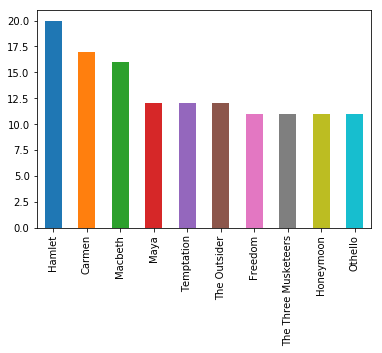

In [191]:
top_ten.plot(kind='bar')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [221]:
movies=movies.astype({'year':int})
counts=movies[(movies['year']<2010) & (movies['year']>=2000)].groupby(['year']).count()
print(counts)
counts.sort_values(by=['title'], ascending=False).head(3)

      title
year       
2000   2779
2001   2896
2002   3019
2003   3177
2004   3512
2005   4030
2006   4296
2007   4467
2008   5151
2009   6125


,title
year,
2009,6125
2008,5151
2007,4467


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [235]:
movies=movies.astype({'year':int})
movies['decade']= (((movies['year']/10).astype(int))*10) 
 

In [240]:
counts=movies.groupby(['decade']).count() 

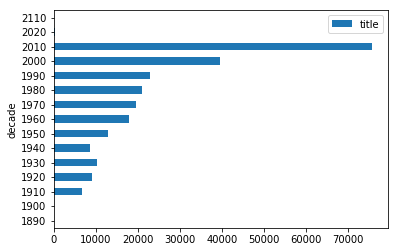

In [247]:
counts.drop('year', axis=1).plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [252]:
character_counts=cast.groupby('character').count()
character_counts.sort_values(by=['title'], ascending=False).head(10)

,title,year,name,type,n
character,,,,,
Himself,20746,20746,20746,20746,7806
Dancer,12477,12477,12477,12477,5635
Extra,11948,11948,11948,11948,4299
Reporter,8434,8434,8434,8434,2722
Student,7773,7773,7773,7773,2309
Doctor,7669,7669,7669,7669,3991
Party Guest,7245,7245,7245,7245,1909
Policeman,7029,7029,7029,7029,3254
Nurse,6999,6999,6999,6999,3327


In [254]:
cast[cast['character']=='Himself'].groupby('name').count().sort_values(by=['title'], ascending=False).head(10)

,title,year,type,character,n
name,,,,,
Adolf Hitler,99,99,99,99,1
Richard Nixon,44,44,44,44,1
Ronald Reagan,41,41,41,41,0
John F. Kennedy,37,37,37,37,1
George W. Bush,25,25,25,25,1
Winston Churchill,24,24,24,24,1
Martin Luther King,23,23,23,23,1
Bill Clinton,22,22,22,22,0
Ron Jeremy,22,22,22,22,17


In [255]:
cast[cast['character']=='Herself'].groupby('name').count().sort_values(by=['title'], ascending=False).head(10)

,title,year,type,character,n
name,,,,,
Queen Elizabeth II,12,12,12,12,0
Joyce Brothers,9,9,9,9,9
Luisa Horga,9,9,9,9,9
Mar?a Luisa (V) Mart?n,9,9,9,9,9
Hillary Clinton,8,8,8,8,0
Margaret Thatcher,8,8,8,8,0
In?s J. Southern,6,6,6,6,6
Marta Berrocal,6,6,6,6,5
Oprah Winfrey,6,6,6,6,2


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [266]:
cast[cast['character'].str.startswith('Zombie')].groupby('character').count().sort_values(by=['title'], ascending=False).head(10)

,title,year,name,type,n
character,,,,,
Zombie,6264,6264,6264,6264,2068
Zombie Horde,206,206,206,206,9
Zombie - Protestor - Victim,78,78,78,78,9
Zombie Extra,70,70,70,70,4
Zombie Dancer,43,43,43,43,13
Zombie Girl,36,36,36,36,11
Zombie #1,36,36,36,36,19
Zombie #2,31,31,31,31,12
Zombie Vampire,25,25,25,25,0


In [267]:
cast[cast['character'].str.startswith('Police')].groupby('character').count().sort_values(by=['title'], ascending=False).head(10)

,title,year,name,type,n
character,,,,,
Policeman,7029,7029,7029,7029,3254
Police Officer,4808,4808,4808,4808,1777
Police Inspector,742,742,742,742,425
Police Sergeant,674,674,674,674,304
Police officer,539,539,539,539,194
Police,456,456,456,456,275
Policewoman,415,415,415,415,272
Police Chief,410,410,410,410,247
Police Captain,387,387,387,387,197


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [280]:
keanu_roles= keanu_df.groupby('year').count().sort_values(by=['year'], ascending=True) 

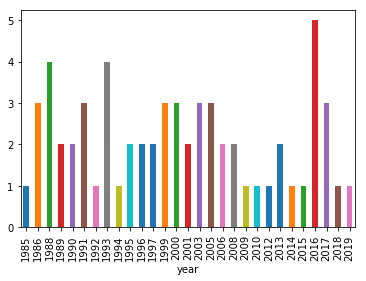

In [281]:
keanu_roles['character'].plot('bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [302]:
keanu_positions=keanu_df[['year' , 'n']].sort_values(by=['year'], ascending=True) 
keanu_positions

,year,n
1892373,1985,1.0
1892403,1986,12.0
1892377,1986,2.0
1892355,1986,3.0
1892395,1988,2.0
1892394,1988,1.0
1892375,1988,6.0
1892349,1988,5.0
1892346,1989,1.0
1892374,1989,8.0


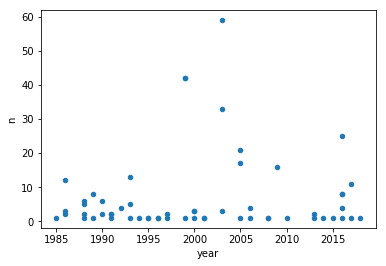

In [301]:
keanu_positions.plot.scatter('year','n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

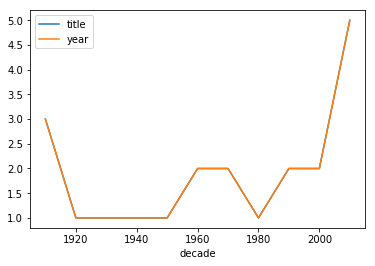

In [310]:
movies[movies['title']=='Hamlet'].groupby('decade').count().plot()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [323]:
cast=cast.astype({'year':int})
print('1960s lead roles:',len(cast[ (cast['n']==1.0) & ( cast.year <1970) & ( cast.year >=1960)]))
print('2000s lead roles:',len(cast[ (cast['n']==1.0) & ( cast.year <2010) & ( cast.year >=2000)]))

1960s lead roles: 11823
2000s lead roles: 26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [345]:
frank_role_counts=cast[cast['name']=='Frank Oz'].groupby(['year','title','name']).count()
frank_role_counts[frank_role_counts['character']>1].sort_values(by=['year'], ascending=True).drop(['type','n'],axis=1) 

character
year title                                name               
1979 The Muppet Movie                     Frank Oz          8
1981 An American Werewolf in London       Frank Oz          2
     The Great Muppet Caper               Frank Oz          6
1982 The Dark Crystal                     Frank Oz          2
1984 The Muppets Take Manhattan           Frank Oz          7
1985 Follow That Bird                     Frank Oz          3
1992 The Muppet Christmas Carol           Frank Oz          7
1996 Muppet Treasure Island               Frank Oz          4
1999 Muppets from Space                   Frank Oz          4
     The Adventures of Elmo in Grouchland Frank Oz          3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [352]:
frank_role_counts=cast[cast['name']=='Frank Oz'].groupby(['character']).count()
frank_role_counts[frank_role_counts['name']>1].sort_values(by=['year'], ascending=True)

,title,year,name,type,n
character,,,,,
Grover,2,2,2,2,2
Bert,3,3,3,3,3
Fozzie Bear,4,4,4,4,4
Cookie Monster,5,5,5,5,4
Sam the Eagle,5,5,5,5,5
Animal,6,6,6,6,6
Miss Piggy,6,6,6,6,6
Yoda,6,6,6,6,5


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

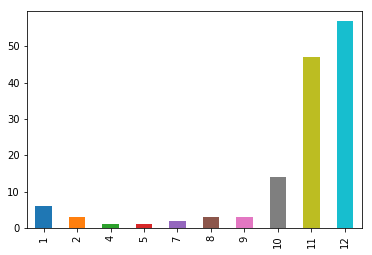

In [353]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

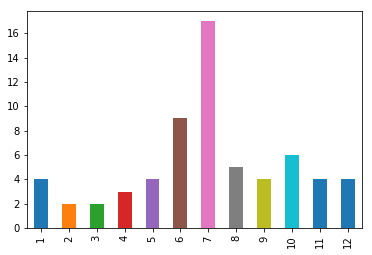

In [354]:
christmas = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

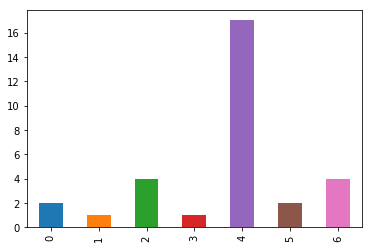

In [357]:
actions = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
#print(actions)
actions.date.dt.weekday.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [366]:

usa_release=release_dates[(release_dates.country=='USA')]

In [372]:
k_df=pd.merge(keanu_df, usa_release,  how='left',left_on=['title','year'], right_on = ['title','year']) 

In [375]:
k_df[k_df.n==1.0].sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n,country,date
31,One Step Away,1985,Keanu Reeves,actor,Ron Petrie,1.0,NaN,NaT
52,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
4,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
3,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
25,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
38,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
2,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
22,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
5,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
12,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

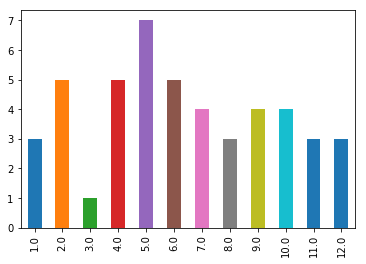

In [376]:
k_df.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [378]:
Ian_df=pd.merge(cast[cast['name']=='Ian McKellen'], usa_release,  how='left',left_on=['title','year'], right_on = ['title','year']) 

In [385]:
ian_counts=Ian_df.groupby('year').count().sort_values(by=['year'], ascending=True)

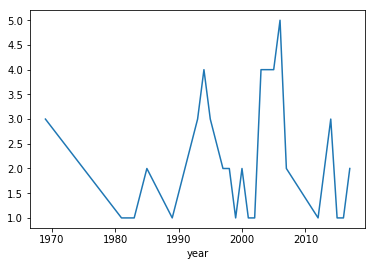

In [418]:
from matplotlib.pyplot import hist
#hist(ian_counts.index, weights= ian_counts['title'])
ian_counts['title']
ian_counts['title'].plot()